In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
import scipy

from pylab import rcParams
rcParams['figure.figsize'] = 16,12
RANDOME_SEED = 101

In [74]:
#importing the dataset
data = pd.read_csv('CreditCard.csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [27]:
# Checkign null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Exploratory Data Analysis

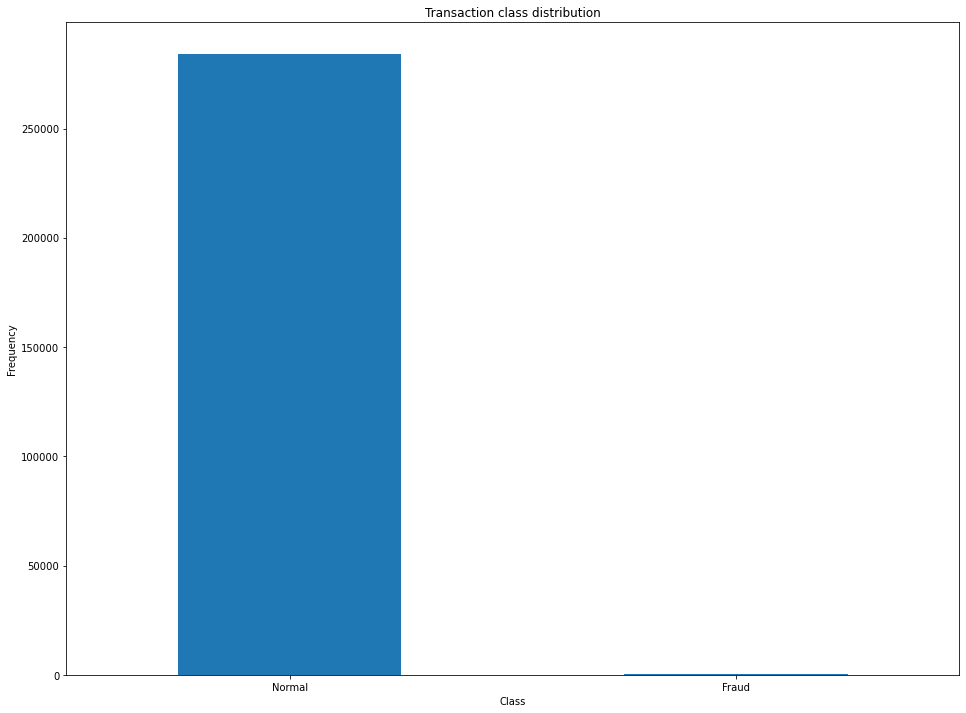

In [86]:
LABELS = ['Normal', 'Fraud']
count_classes = data['Class'].value_counts(sort =True)
count_classes.plot(kind = 'bar', rot = 0, title = 'Transaction class distribution', xlabel = 'Class', ylabel = 'Frequency')
plt.xticks(range(2), LABELS)
plt.show()

In [77]:
fraud = data[data['Class'] == 1]
normal = data[data['Class']==0]
print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [78]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [79]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

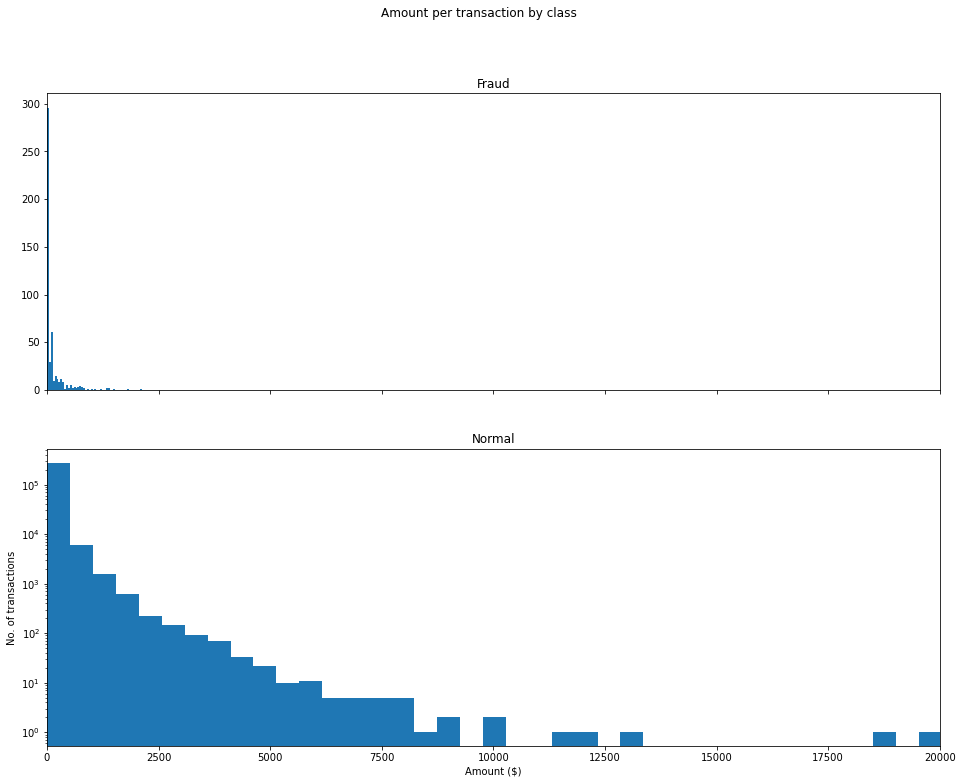

In [87]:
f, axes = plt.subplots(2,1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
axes[0].hist(fraud.Amount, bins =50)
axes[0].set_title('Fraud')

axes[1].hist(normal.Amount, bins = 50)
axes[1].set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('No. of transactions')

plt.xlim(0,20000)
plt.yscale('log')
plt.show()


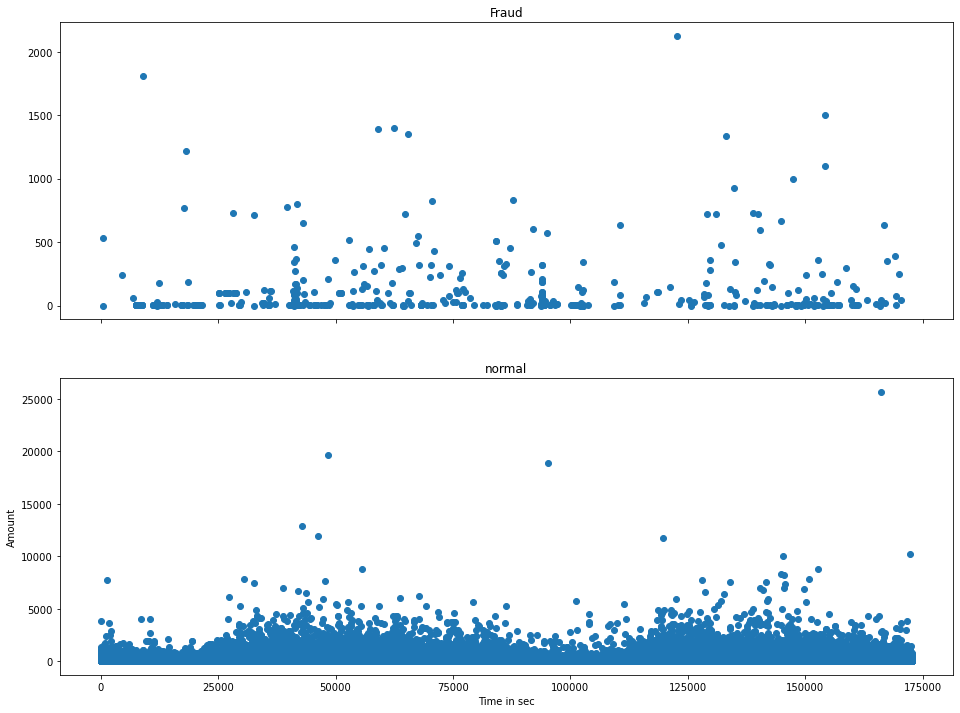

In [35]:
fig, axes = plt.subplots(2,1, sharex = True)
f.suptitle = ('Time of transaction vs amount by class')
axes[0].scatter(fraud.Time, fraud.Amount)
axes[0].set_title('Fraud')

axes[1].scatter(normal.Time, normal.Amount)
axes[1].set_title('normal')

plt.xlabel('Time in sec')
plt.ylabel('Amount')
plt.show()

<AxesSubplot:xlabel='Time', ylabel='Density'>

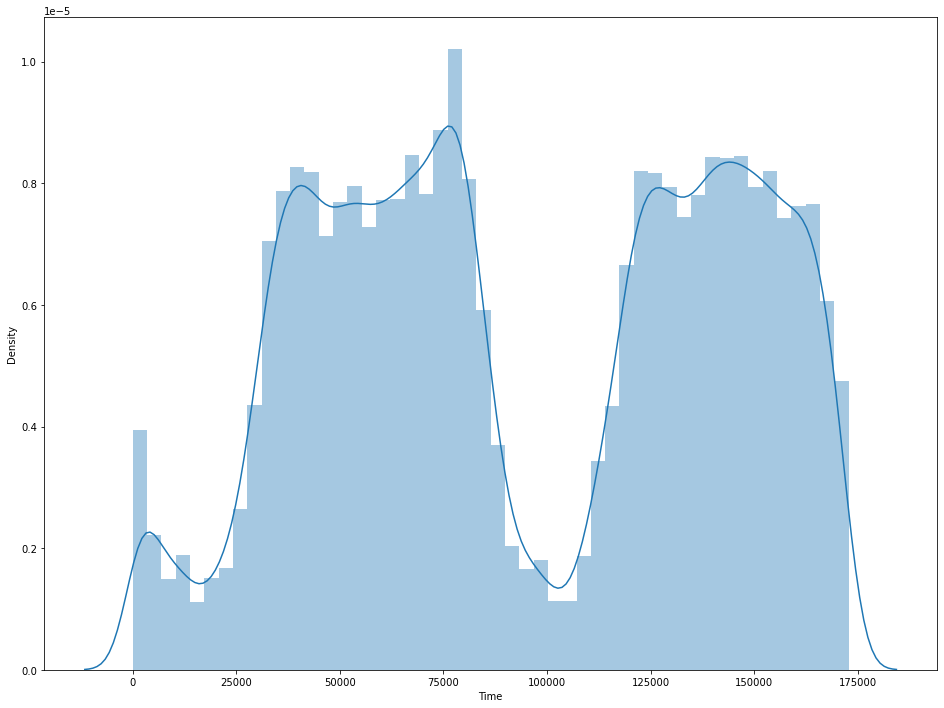

In [36]:
sns.distplot(data['Time'])

In [38]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [39]:
outlier_fraction = len(fraud)/(len(normal)+ len(fraud))
outlier_fraction

0.001727485630620034

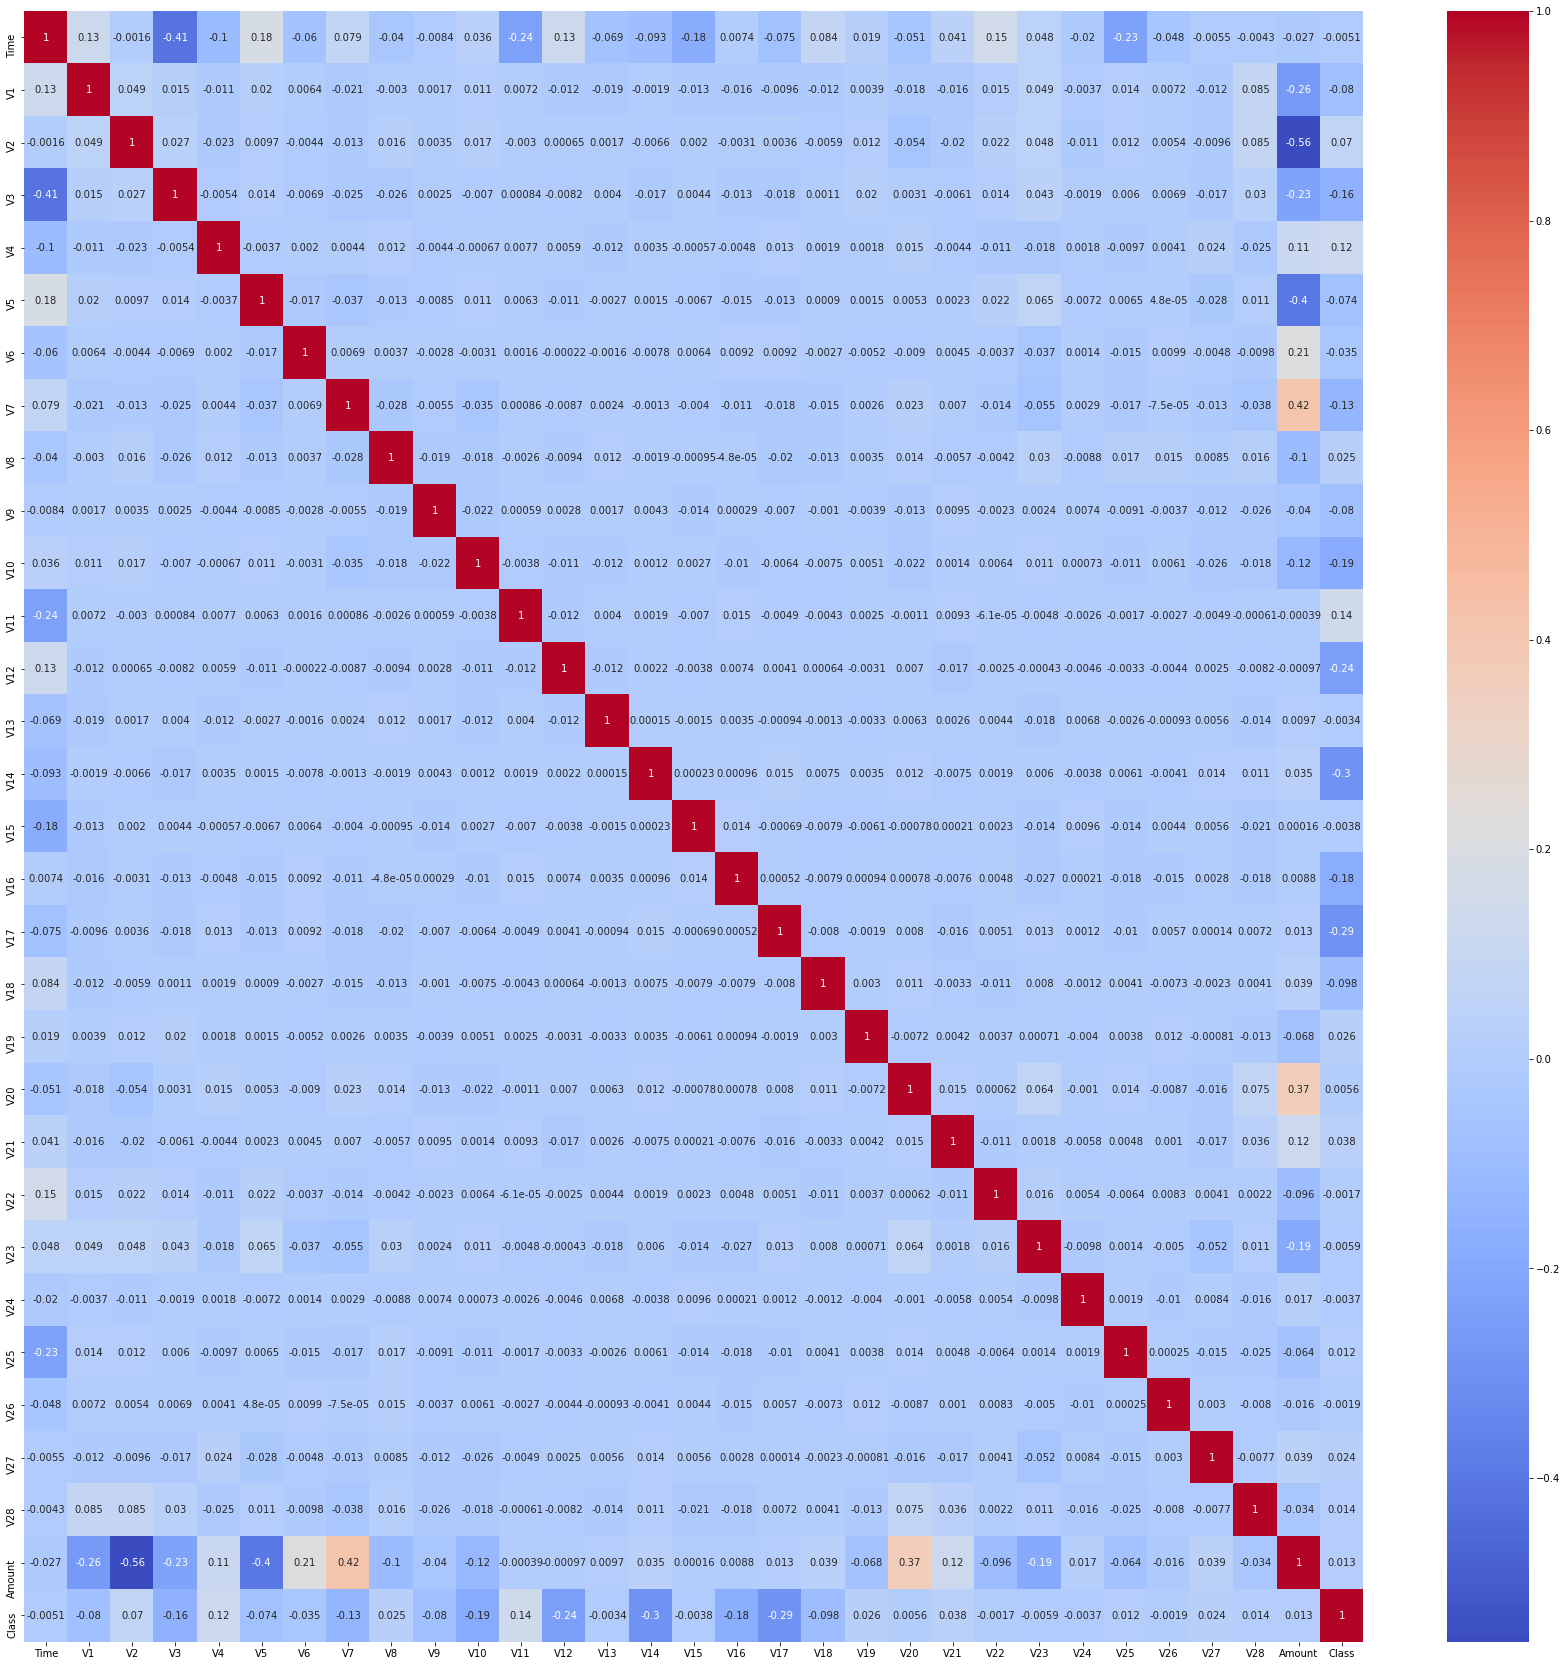

In [41]:
# Heat map
plt.figure(figsize= (30,30)) # to increase the figure size
corfig = sns.heatmap(data1.corr(), annot =True, cmap = 'coolwarm')

## Train-Test split

In [22]:
X = data.drop(['Class'], axis = 1)
Y = data['Class']

In [42]:
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [43]:
#Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.70, random_state = 110)

# Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_train_predict = logreg.predict(x_train)
y_test_predict = logreg.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
# Classification Report

print('classification_report_train: ', classification_report(y_train, y_train_predict))
print('-------------------------------')
print('classification_report_test: ',classification_report(y_test, y_test_predict))

classification_report_train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.70      0.62      0.66       352

    accuracy                           1.00    199364
   macro avg       0.85      0.81      0.83    199364
weighted avg       1.00      1.00      1.00    199364

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.69      0.61      0.65       140

    accuracy                           1.00     85443
   macro avg       0.85      0.81      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [50]:
# Confusion Matrix

print('confusion_matrix_train :', confusion_matrix(y_train, y_train_predict))
print('-------------------------------')
print('confusion_matrix_test: ', confusion_matrix(y_test, y_test_predict))

confusion_matrix_train : [[198917     95]
 [   133    219]]
-------------------------------
confusion_matrix_test:  [[85265    38]
 [   54    86]]


In [52]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_train_predict))
print('-------------------------------')
print('accuracy_score_test :', accuracy_score(y_test, y_test_predict))

accuracy_score_train:  0.9988563632350875
-------------------------------
accuracy_score_test : 0.9989232587807076


## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)

y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [69]:
# Accuracy SCore

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_dt_train))
print('-------------------------------')
print('accuracy_score_test: ', accuracy_score(y_test,y_pred_dt_test))

accuracy_score_train:  1.0
-------------------------------
accuracy_score_test:  0.9993445923013002


In [70]:
#Confusion Matrix

print('confusion_matrix_train: ', confusion_matrix(y_train, y_pred_dt_train))
print('-------------------------------')
print('confusion_matrix_test: ', confusion_matrix(y_test, y_pred_dt_test))

confusion_matrix_train:  [[199012      0]
 [     0    352]]
-------------------------------
confusion_matrix_test:  [[85277    26]
 [   30   110]]


In [71]:
# Classification report

print('classification_report_train: ', classification_report(y_train, y_pred_dt_train))
print('-------------------------------')
print('classification_report_test: ', classification_report(y_test, y_pred_dt_test))

classification_report_train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.81      0.79      0.80       140

    accuracy                           1.00     85443
   macro avg       0.90      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



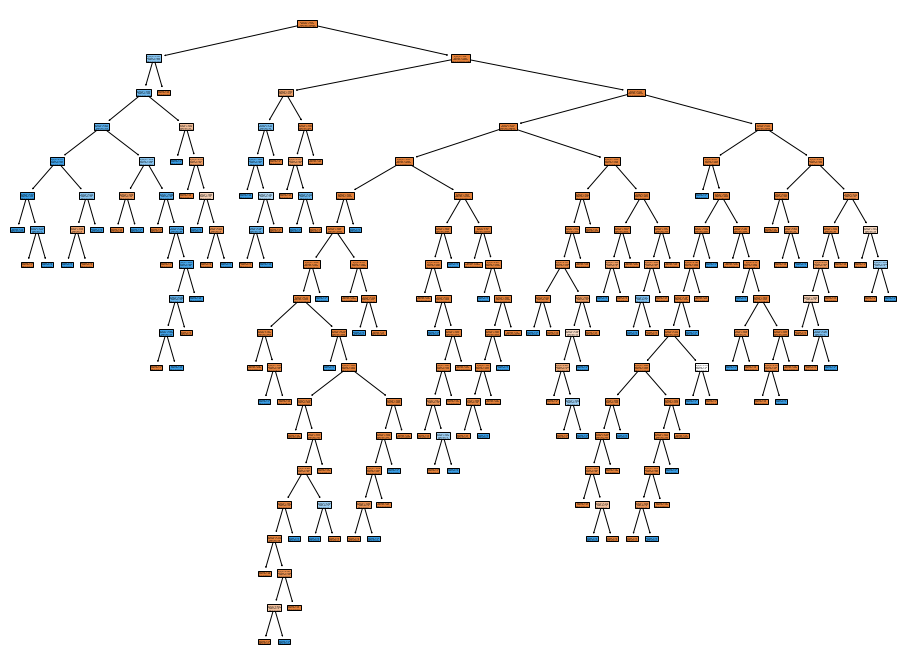

In [59]:
from sklearn import tree
tree.plot_tree(dtree, filled = True)
plt.show()

## Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [61]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [146]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_rfc_train))
print('-------------------------------')
print('accuracy_score_test: ',accuracy_score(y_test,y_pred_rfc_test))

1.0
-------------------------------
0.9992978349912229


In [62]:
# Confusion Matrix

print('confusion_matrix_train :', confusion_matrix(y_train, y_pred_rfc_train))
print('-------------------------------')
print('confusion_matrix_test :' , confusion_matrix(y_test, y_pred_rfc_test))

confusion_matrix_train : [[199012      0]
 [     0    352]]
-------------------------------
confusion_matrix_test : [[85302     1]
 [   31   109]]


In [63]:
#Classsification report

print('classification_report_train: ', classification_report(y_train, y_pred_rfc_train))
print('-------------------------------')
print('classification_report_test: ', classification_report(y_test, y_pred_rfc_test))

classification_report_train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.99      0.78      0.87       140

    accuracy                           1.00     85443
   macro avg       1.00      0.89      0.94     85443
weighted avg       1.00      1.00      1.00     85443



## XGBoost 

In [64]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
y_pred_xgb_train = xgb_classifier.predict(x_train)
y_pred_xgb_test = xgb_classifier.predict(x_test)

In [165]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_xgb_train))
print('-------------------------------')
print('accuracy_score_test: ', accuracy_score(y_test,y_pred_xgb_test))

1.0
-------------------------------
0.9991808074897601


In [66]:
# Confusion Matrix

print('confusion_matrix_train: ', confusion_matrix(y_train, y_pred_xgb_train))
print('-------------------------------')
print('confusion_matrix_test: ', confusion_matrix(y_test, y_pred_xgb_test))

confusion_matrix_train:  [[199012      0]
 [     0    352]]
-------------------------------
confusion_matrix_test:  [[85301     2]
 [   30   110]]


In [67]:
# Classification Report

print('classification_report_train: ', classification_report(y_train, y_pred_xgb_train))
print('-------------------------------')
print('classification_report_test: ', classification_report(y_test, y_pred_xgb_test))

classification_report_train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.98      0.79      0.87       140

    accuracy                           1.00     85443
   macro avg       0.99      0.89      0.94     85443
weighted avg       1.00      1.00      1.00     85443

